## Machine learning:
  
                                                                

 Question: 1

1. Imagine you have a dataset where you have different Instagram features like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted. 
Dataset This is the Dataset You can use this dataset for this question. 

In [44]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26

In [49]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 660.6 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 660.6 kB/s eta 0:00:01
   --- ----------------------------------- 30.7/300.2 kB 660.6 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/300.2 kB 416.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/300.2 kB 416.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/300.2 kB 416.7 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 426.7 kB/s eta 0:00:01
   ------------

In [50]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import tensorflow as tf
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 
stopwords.add('will')
import re

In [51]:
dataFrame = pd.read_csv('instagram_reach.csv')
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [52]:
def WordCloudPlotter(dfColumn):
    colData = dataFrame[dfColumn]
    textCloud = ''
    
   
    for mem in colData:
        textCloud = textCloud + str(mem)
    
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey', 
                          stopwords = stopwords,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(dfColumn))
    plt.tight_layout(pad = 0) 
  
    plt.show() 

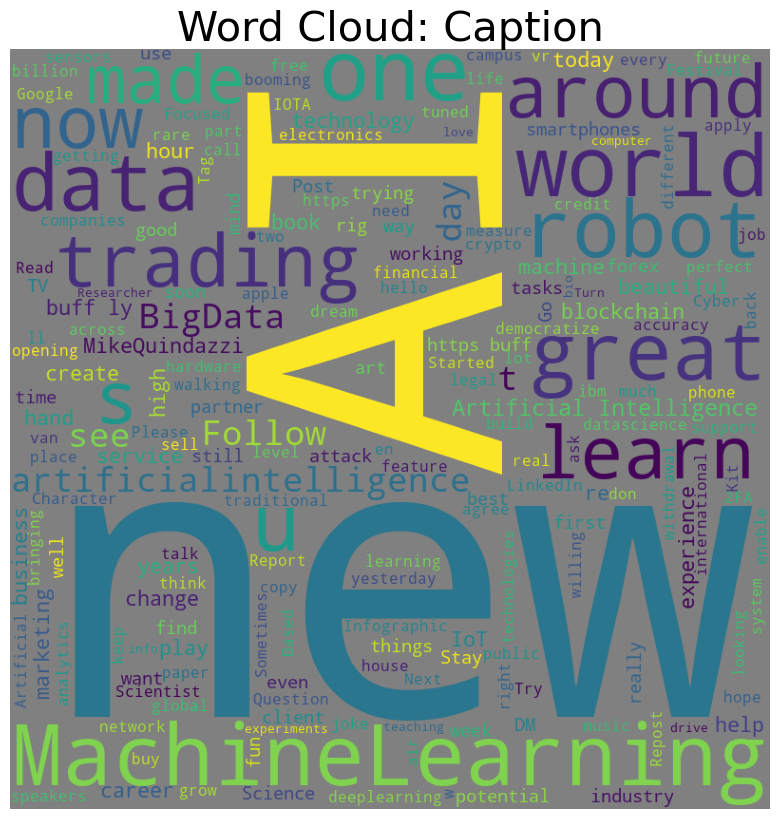

In [53]:
WordCloudPlotter('Caption')

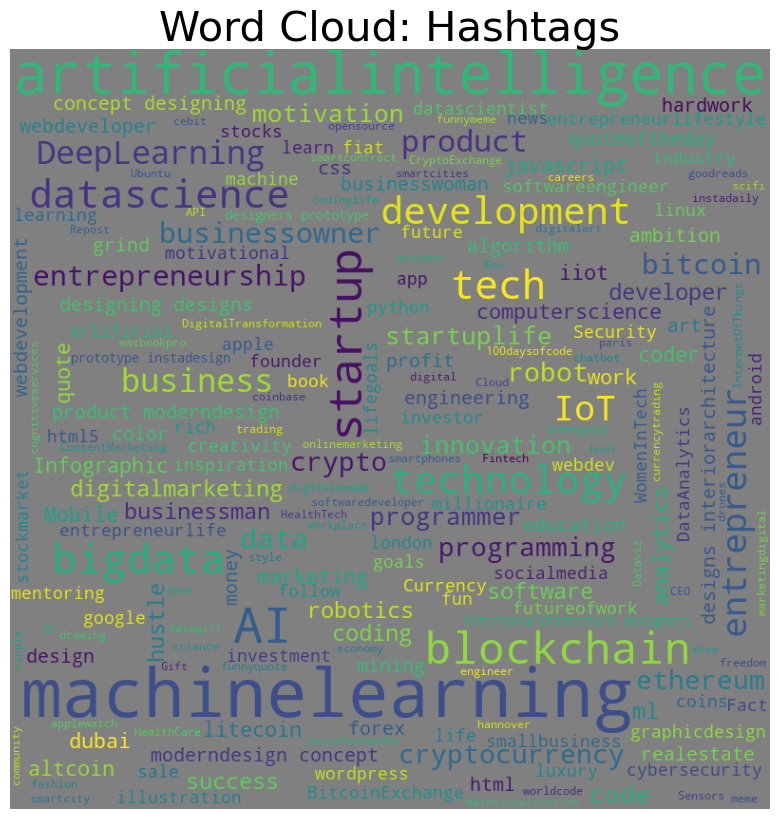

In [54]:
WordCloudPlotter('Hashtags')

In [55]:
dataFrame['Time since posted'] = dataFrame['Time since posted'].map(lambda a: int(re.sub('hours', '', a)))

In [56]:
def PlotDataGiveConclusion2 (featureVector):
    plt.figure(figsize= (20, 10))
    
    pltNum = 1
    for mem in featureVector:
        plt.subplot(1, 2 , pltNum)
        plt.grid(True)
        plt.title('Regplot Plot for '+ str(mem))
        sb.regplot(data = dataFrame, x = mem, y = 'Likes' , color = 'green')
        pltNum += 1
    
    plt.show()

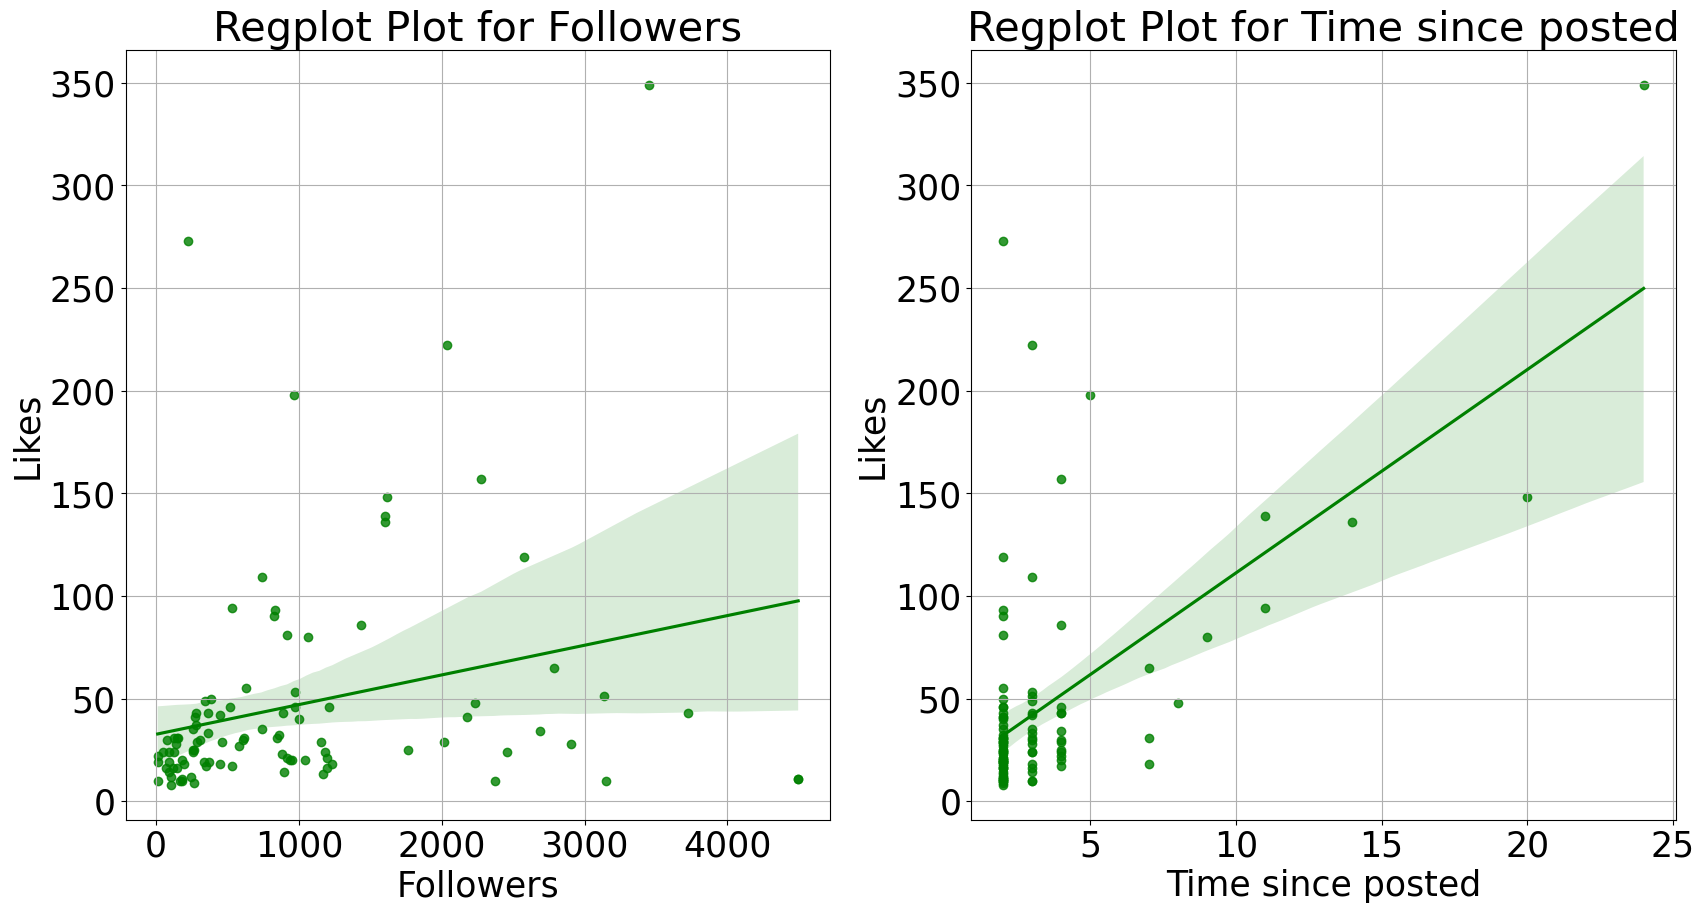

In [57]:
PlotDataGiveConclusion2(['Followers', 'Time since posted'])

In [58]:
featureVector = np.array(dataFrame[['Followers', 'Time since posted']], dtype = 'float32')
targets = np.array(dataFrame['Likes'], dtype = 'float32')
maxValLikes = max(targets)
print('Max value of target is {}'.format(maxValLikes))

Max value of target is 349.0


In [59]:
targets = targets/maxValLikes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(featureVector, targets, test_size = 0.1, random_state = 42)

stdSc = StandardScaler()
xTrain = stdSc.fit_transform(xTrain)
xTest = stdSc.transform(xTest)

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(xTrain, yTrain)

GradientBoostingRegressor()

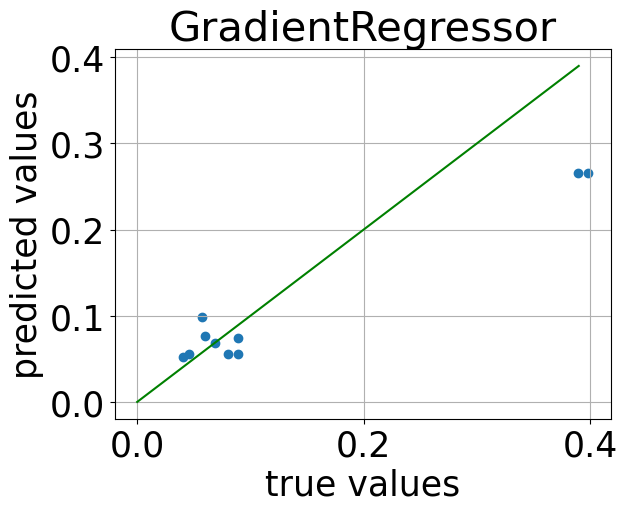

In [61]:
predictions = gbr.predict(xTest)
plt.scatter(yTest, predictions)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('GradientRegressor')
plt.plot(np.arange(0,0.4, 0.01), np.arange(0, 0.4, 0.01), color = 'green')
plt.grid(True)

In [62]:
def PredictionsWithConstantFollowers(model, followerCount, scaller, maxVal):
    followers = followerCount * np.ones(24)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with ' + str(followerCount) +' followers')
    plt.show()

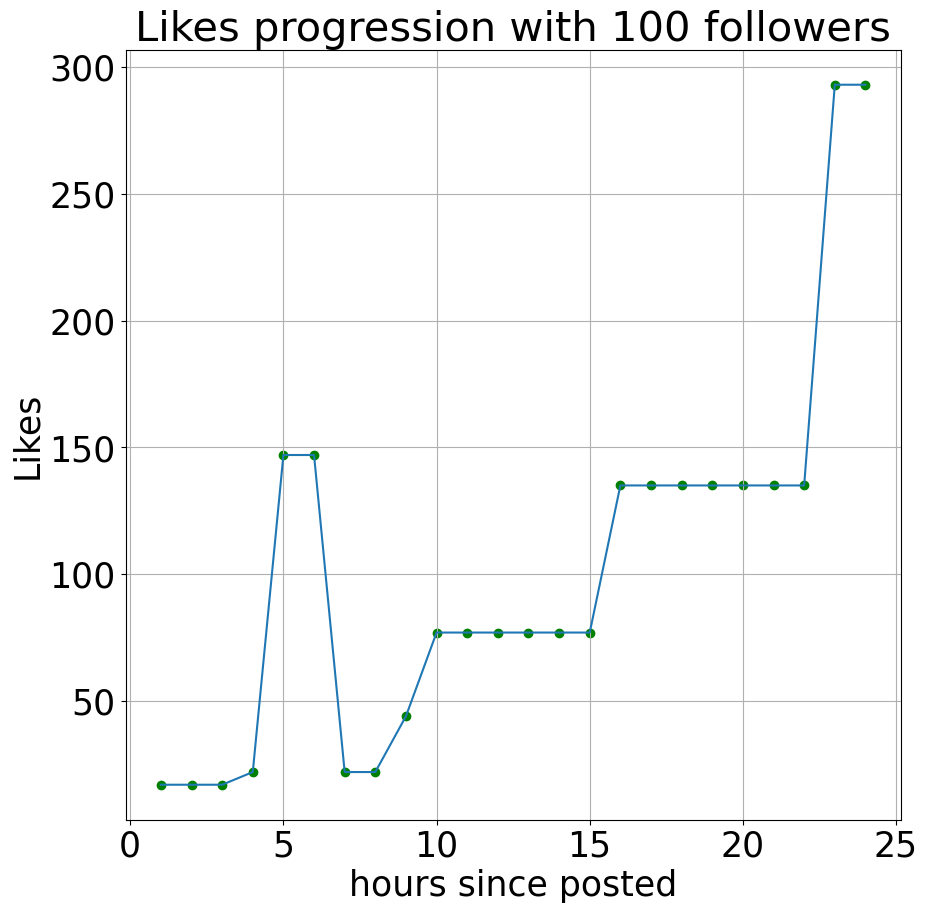

In [63]:
PredictionsWithConstantFollowers(gbr, 100, stdSc, maxValLikes)

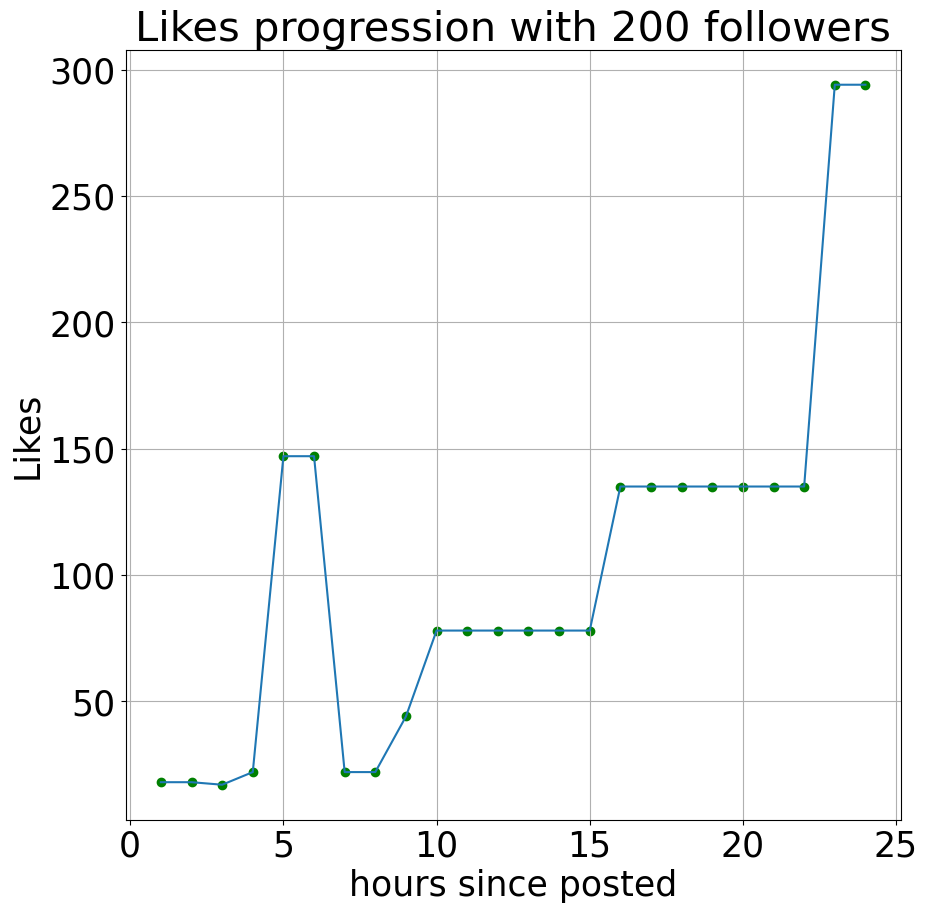

In [64]:
PredictionsWithConstantFollowers(gbr, 200, stdSc, maxValLikes)

In [67]:
def PredictionsWithVariableFollowers(model, followerCount, scaller, maxVal):
    followers = np.arange(100, 2500, 100)
    hours = np.arange(1, 25)
    
    # defining vector 
    featureVector = np.zeros((24, 2))
    featureVector[:, 0] = followers
    featureVector [:, 1] = hours
    
    # doing scalling
    featureVector = scaller.transform(featureVector)
    predictions = model.predict(featureVector)
    predictions = (maxValLikes * predictions).astype('int')
    
    plt.figure(figsize= (10, 10))
    plt.plot(hours, predictions)
    plt.scatter(hours, predictions, color = 'g')
    plt.grid(True)
    plt.xlabel('hours since posted')
    plt.ylabel('Likes')
    plt.title('Likes progression with variable followers')
    plt.show()

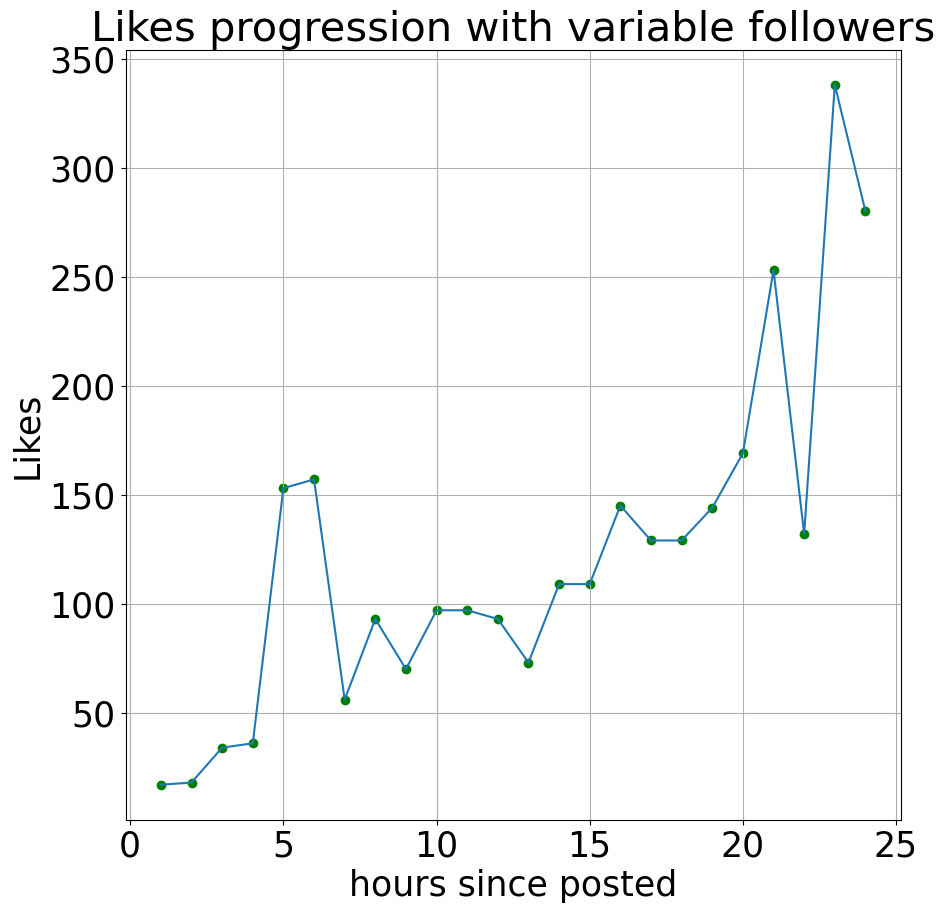

In [68]:
PredictionsWithVariableFollowers(gbr, 1000, stdSc, maxValLikes)

#                                                                ## Question: 2
Explain how you can implement ML in a real world application.

Train an SVM regressor on : Bengaluru housing dataset

                  Must include in details:

                           - EDA

                            - Feature engineering

In [69]:
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [70]:
import numpy as np 
import pandas as pd

In [71]:
df = pd.read_csv("Bengaluru_House_Data.csv")

In [72]:
df1 = df.drop(['area_type','society','balcony','availability'],axis = 1)

In [73]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [75]:
df2 = df1.dropna()
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [76]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [77]:
df2['size'].value_counts()

size
2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [79]:
df2['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))

C:\Users\samkp\AppData\Local\Temp\ipykernel_24708\2499240759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))


In [80]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [81]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [82]:
df2[~df2['total_sqft'].apply(is_float)].head()

location   size   total_sqft  bath    price  bhk
30            Yelahanka  4 BHK  2100 - 2850   4.0  186.000    4
122              Hebbal  4 BHK  3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar  2 BHK  1042 - 1105   2.0   54.005    2
165            Sarjapur  2 BHK  1145 - 1340   2.0   43.490    2
188            KR Puram  2 BHK  1015 - 1540   2.0   56.800    2

In [83]:
def convert(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [84]:
convert('333 - 333')

333.0

In [85]:
df3 = df2.copy()
df3['total_sqft']  =  df2['total_sqft'].apply(convert)

In [86]:
df3.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [87]:
df3 = df3.dropna()

In [88]:
df4 = df3.copy()

In [89]:
df4['price_per_sqrt'] = df4['price']*100000/df4['total_sqft']

In [91]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [92]:
len(df4.location.unique())

1298

In [93]:
df4.location = df4.location.apply(lambda x : x.strip())

In [94]:
df4.location.value_counts()

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [95]:
loc_state = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [96]:
loc_state_less_10 = loc_state[loc_state<=10]

In [97]:
loc_state_less_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [98]:
df4.location = df4.location.apply(lambda x: 'other' if x in loc_state_less_10 else x)

In [99]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Devarachikkanahalli',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'Kalena Agrahara', 'Kaval Byrasandra', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - At

In [100]:
df5  = df4[~(df4.total_sqft/df4.bhk < 300)]

In [101]:
df5.price_per_sqrt.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqrt, dtype: float64

In [102]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqrt)
        st = np.std(subdf.price_per_sqrt)
        reduced_df = subdf[(subdf.price_per_sqrt>(m-st)) & (subdf.price_per_sqrt<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(10242, 7)

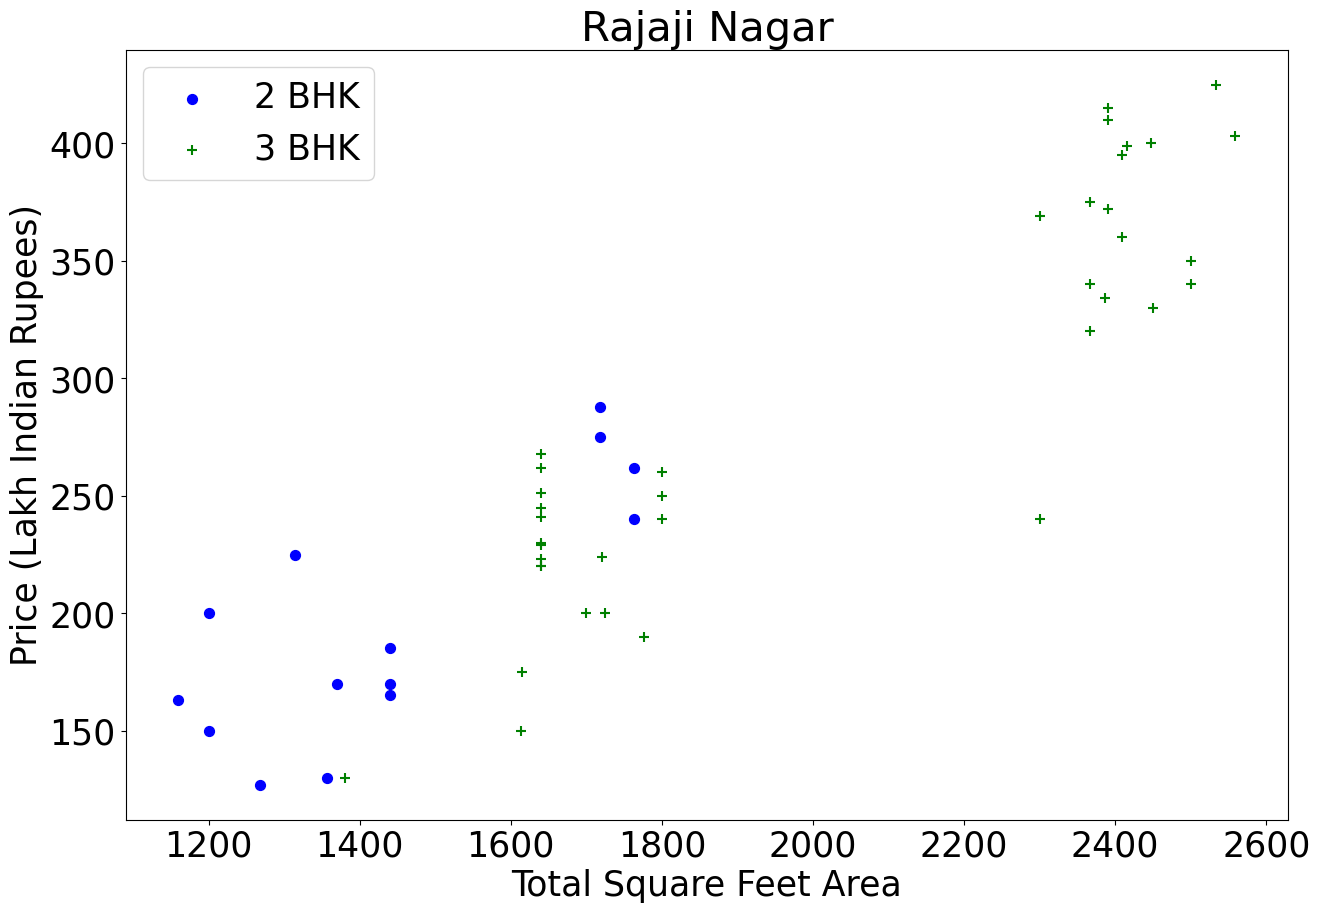

In [103]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")


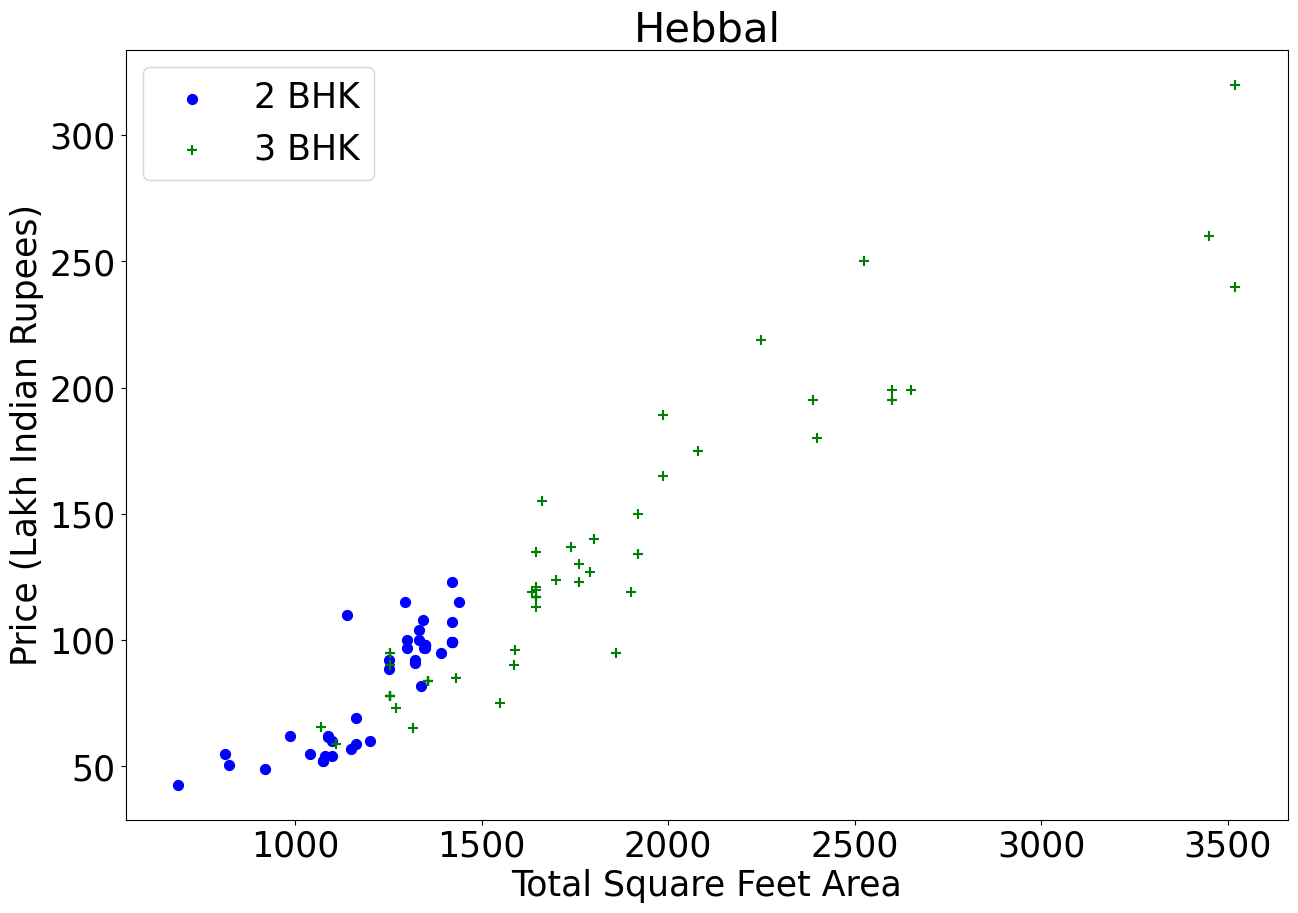

In [104]:
plot_scatter_chart(df6,"Hebbal")

In [105]:

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqrt),
                'std': np.std(bhk_df.price_per_sqrt),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqrt<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(7317, 7)

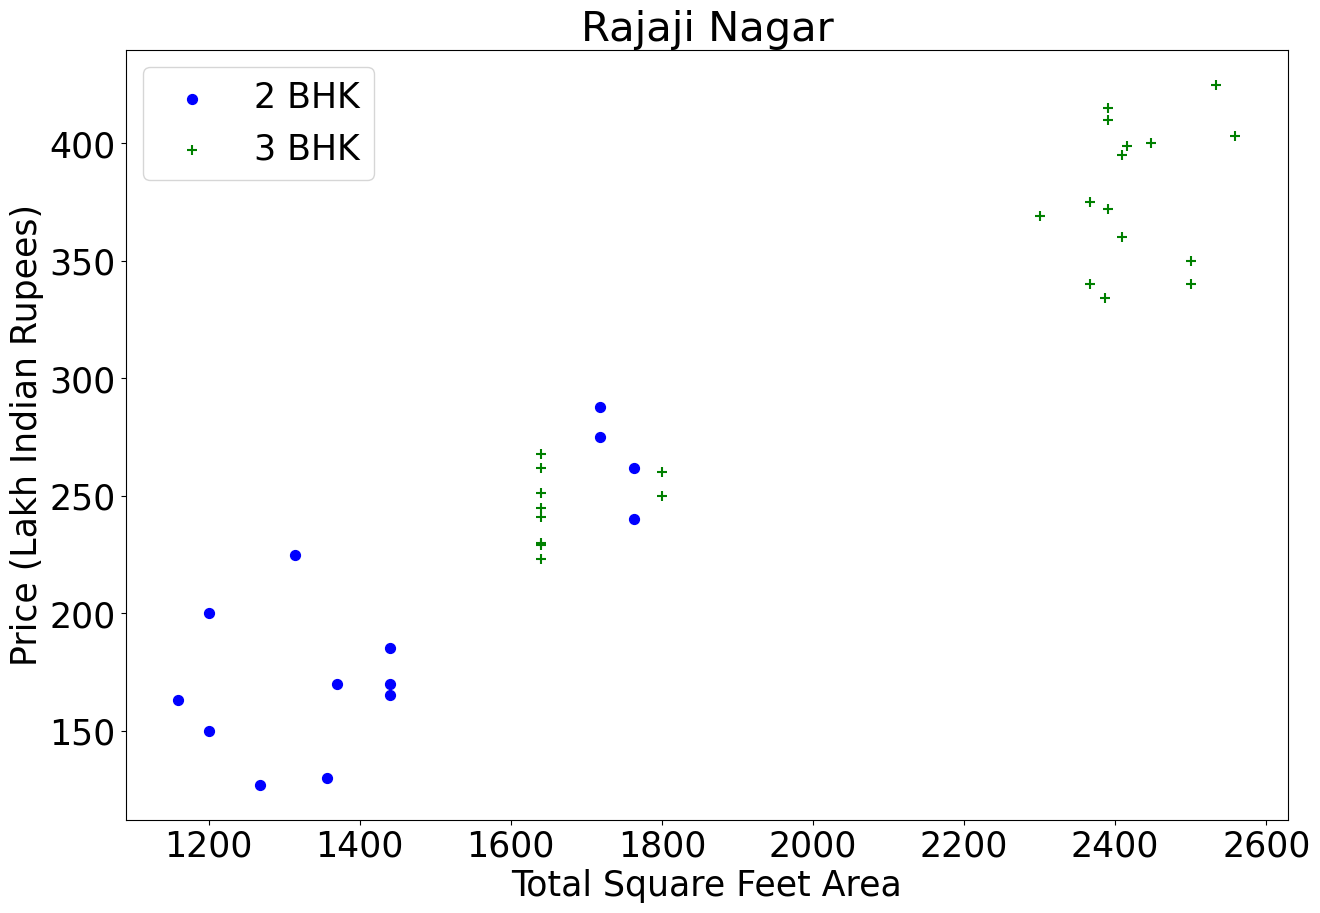

In [106]:
df8 = df7.copy()
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

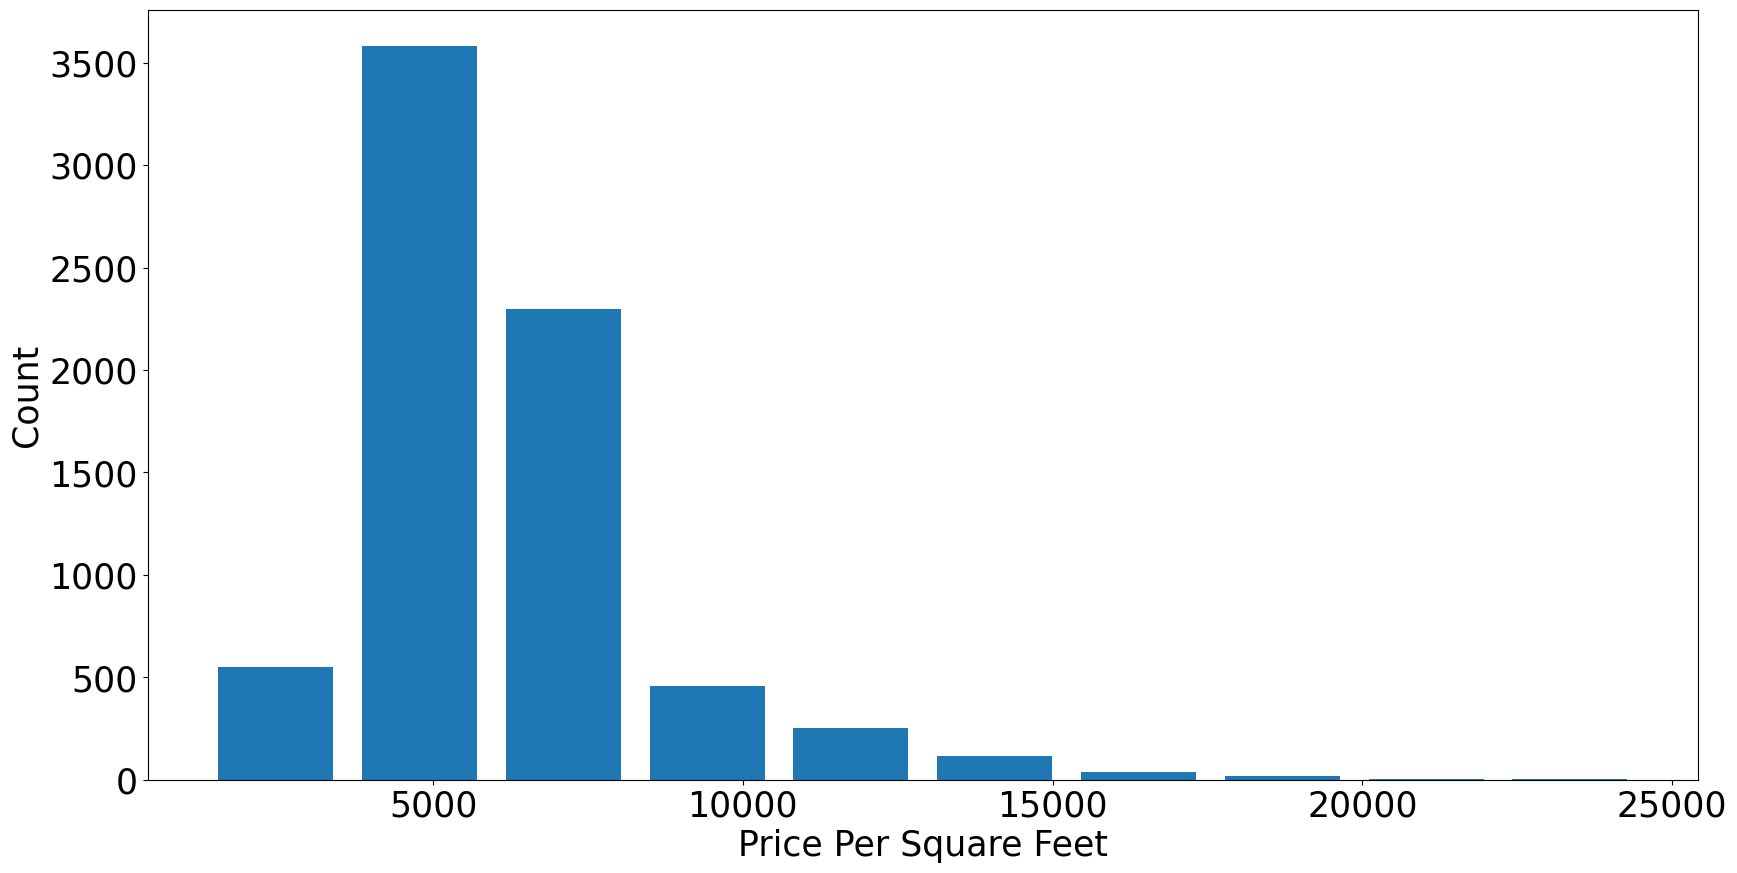

In [107]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqrt,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

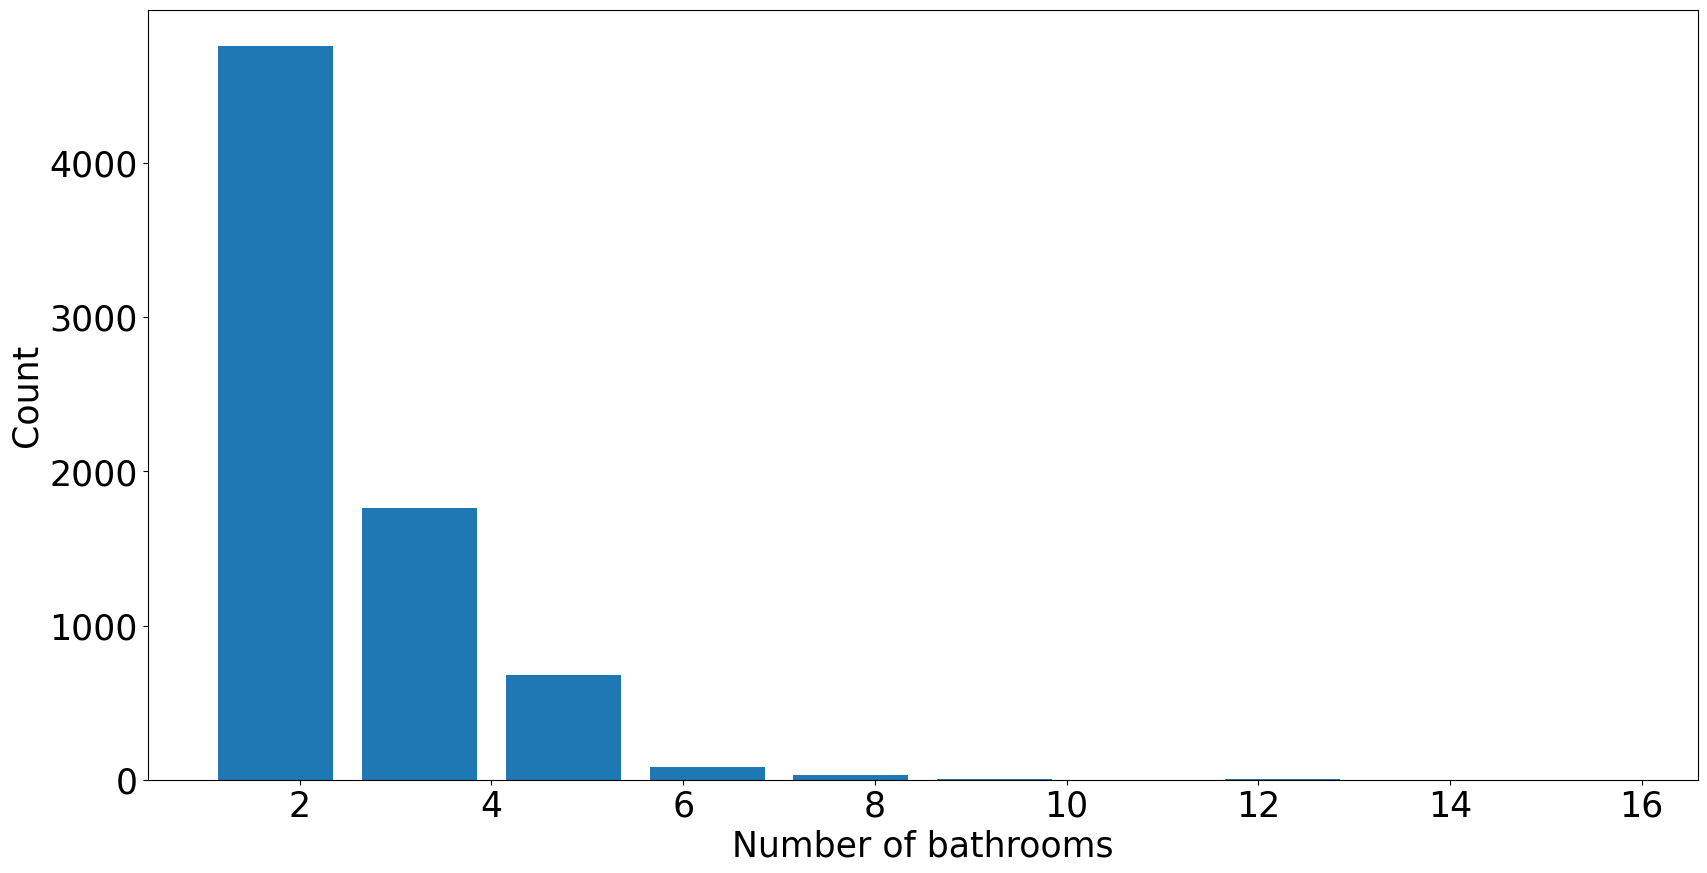

In [108]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [109]:
df8[df8.bath>df8.bhk+2]

location       size  total_sqft  bath   price  bhk  price_per_sqrt
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6711    Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8408          other      6 BHK     11338.0   9.0  1000.0    6     8819.897689

In [110]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [111]:
df10 = df9.drop(['size','price_per_sqrt'],axis='columns')
df10.head(3)

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3

In [112]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                 True               False                      False   
1                 True               False                      False   
2                 True               False                      False   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                 False                 False               False   
1                 False                 False               False   
2                 False                 False               False   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0               False               False               False   
1               False               False               False   
2               False               False               False   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0               False  ...                 False               False   
1               False  ...                 False               False   
2               False  ...                 False               False   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0        False       False           False      False               False   
1        False       False           False      False               False   
2        False       False           False      False               False   

   Yelenahalli  Yeshwanthpur  other  
0        False         False  False  
1        False         False  False  
2        False         False  False  

[3 rows x 241 columns]

In [113]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                 True   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                 True   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                 True   
3  1st Block Jayanagar      1200.0   2.0  130.0    3                 True   
4  1st Block Jayanagar      1235.0   2.0  148.0    2                 True   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0               False                      False                 False   
1               False                      False                 False   
2               False                      False                 False   
3               False                      False                 False   
4               False                      False                 False   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                 False  ...        False                 False   
1                 False  ...        False                 False   
2                 False  ...        False                 False   
3                 False  ...        False                 False   
4                 False  ...        False                 False   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0               False        False       False           False      False   
1               False        False       False           False      False   
2               False        False       False           False      False   
3               False        False       False           False      False   
4               False        False       False           False      False   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               False        False         False  
1               False        False         False  
2               False        False         False  
3               False        False         False  
4               False        False         False  

[5 rows x 245 columns]

In [114]:
df12 = df11.drop('location',axis='columns')
df12.head()

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                 True               False   
1      1630.0   3.0  194.0    3                 True               False   
2      1875.0   2.0  235.0    3                 True               False   
3      1200.0   2.0  130.0    3                 True               False   
4      1235.0   2.0  148.0    2                 True               False   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                      False                 False                 False   
1                      False                 False                 False   
2                      False                 False                 False   
3                      False                 False                 False   
4                      False                 False                 False   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0               False  ...        False                 False   
1               False  ...        False                 False   
2               False  ...        False                 False   
3               False  ...        False                 False   
4               False  ...        False                 False   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0               False        False       False           False      False   
1               False        False       False           False      False   
2               False        False       False           False      False   
3               False        False       False           False      False   
4               False        False       False           False      False   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               False        False         False  
1               False        False         False  
2               False        False         False  
3               False        False         False  
4               False        False         False  

[5 rows x 244 columns]

In [115]:
x = df12.drop(['price'],axis='columns')
y = df12.price

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [117]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8629132245229485

In [118]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=6, test_size=0.25, random_state=42)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.80249662, 0.85018175, 0.85645189, 0.88455028, 0.8319578 ,
       0.87395509])

In [1]:
## Question 3

In [2]:
import numpy as np
import pandas as pd
#get the wine dataset from sklearn and take a look at the description provided
from sklearn import datasets
wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [3]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['label'] = wine.target
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  label  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0  
2                          3.17   1185.0      0  
3                          3.45   1480.0      0  
4                          2.93    735.0      0

In [4]:
np.bincount(df["label"])
#check the percentage representation of the classes
df.label.value_counts(normalize=True).round(2)

label
1    0.40
0    0.33
2    0.27
Name: proportion, dtype: float64

In [6]:
!pip install missingno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

<Axes: >

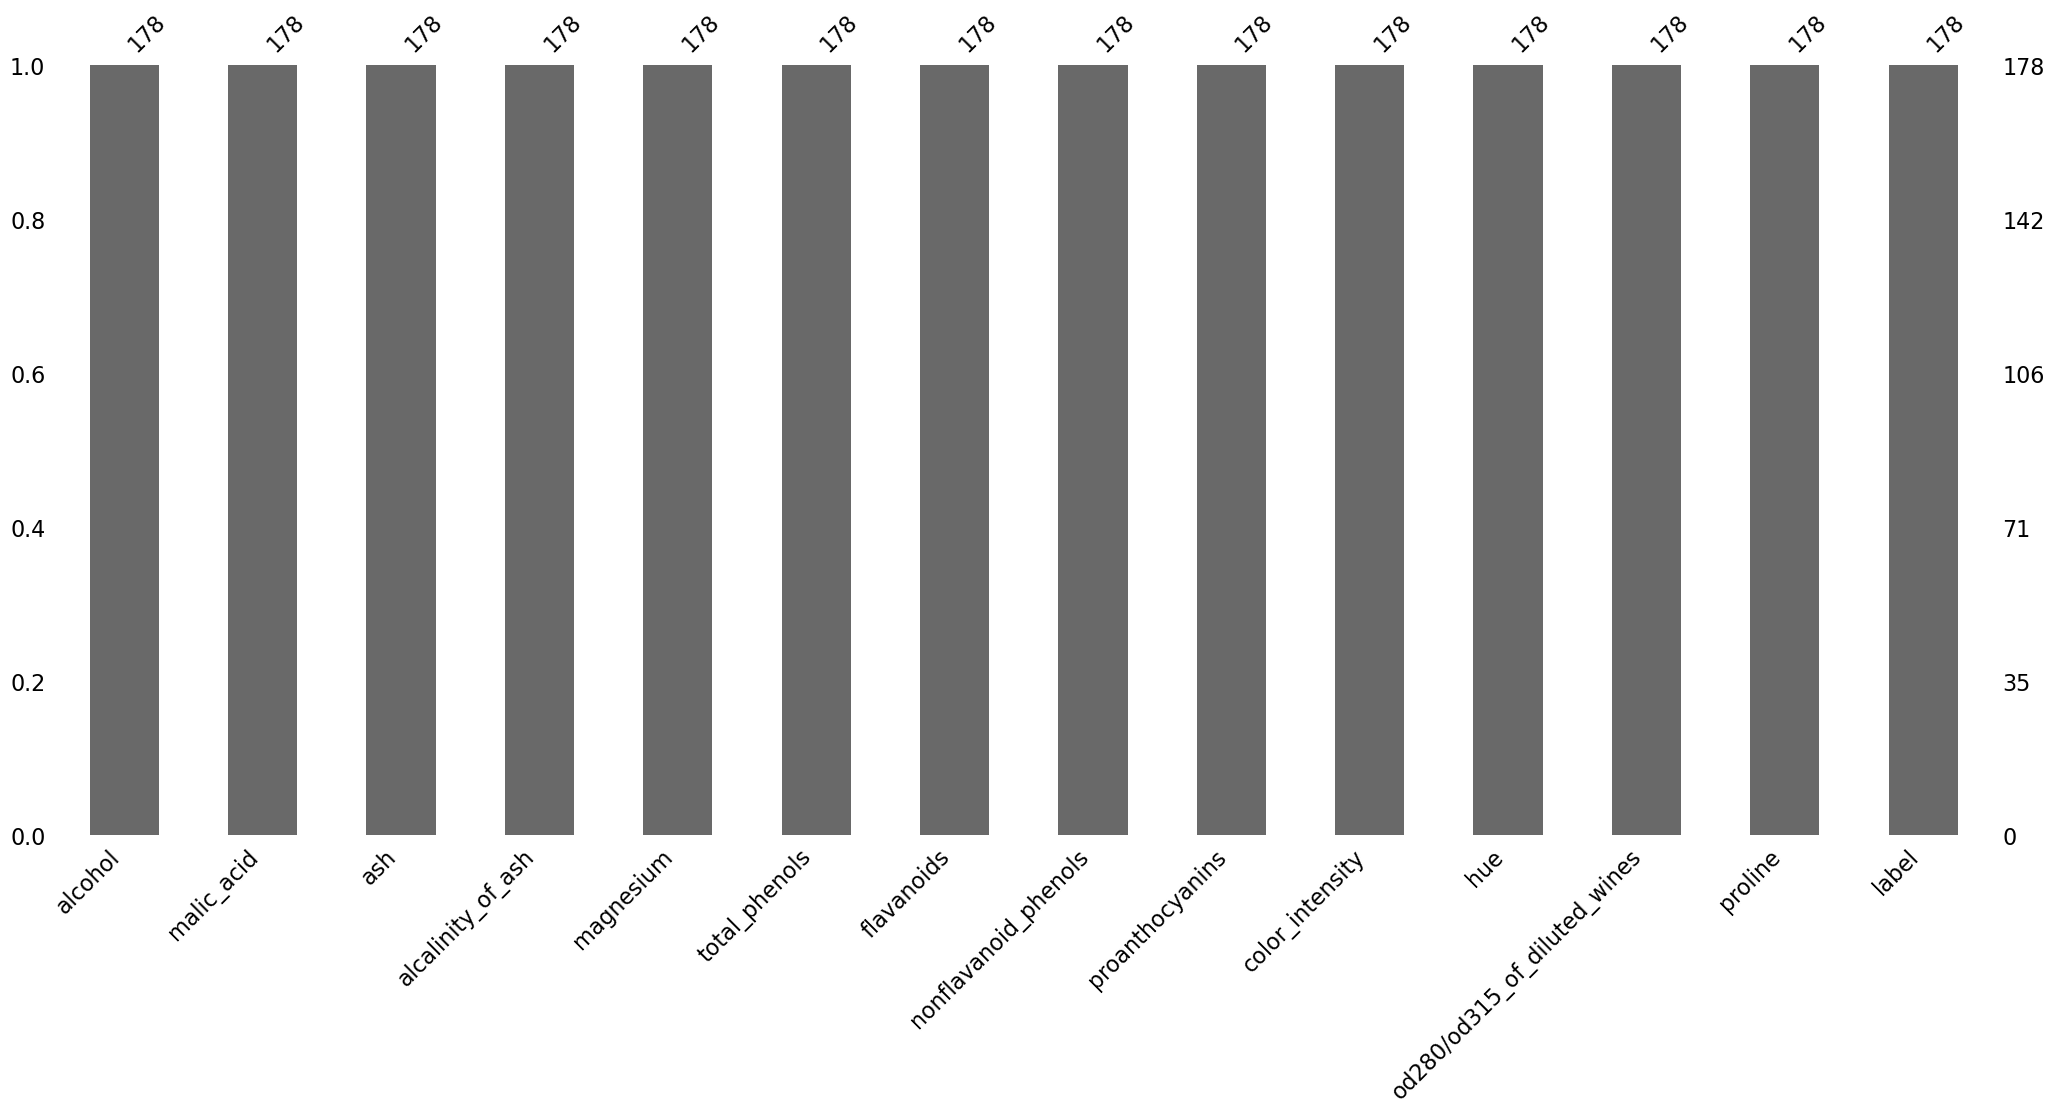

In [7]:
# check the missing values 
#check for null/missing values
df.info()
import missingno as msno
msno.bar(df)

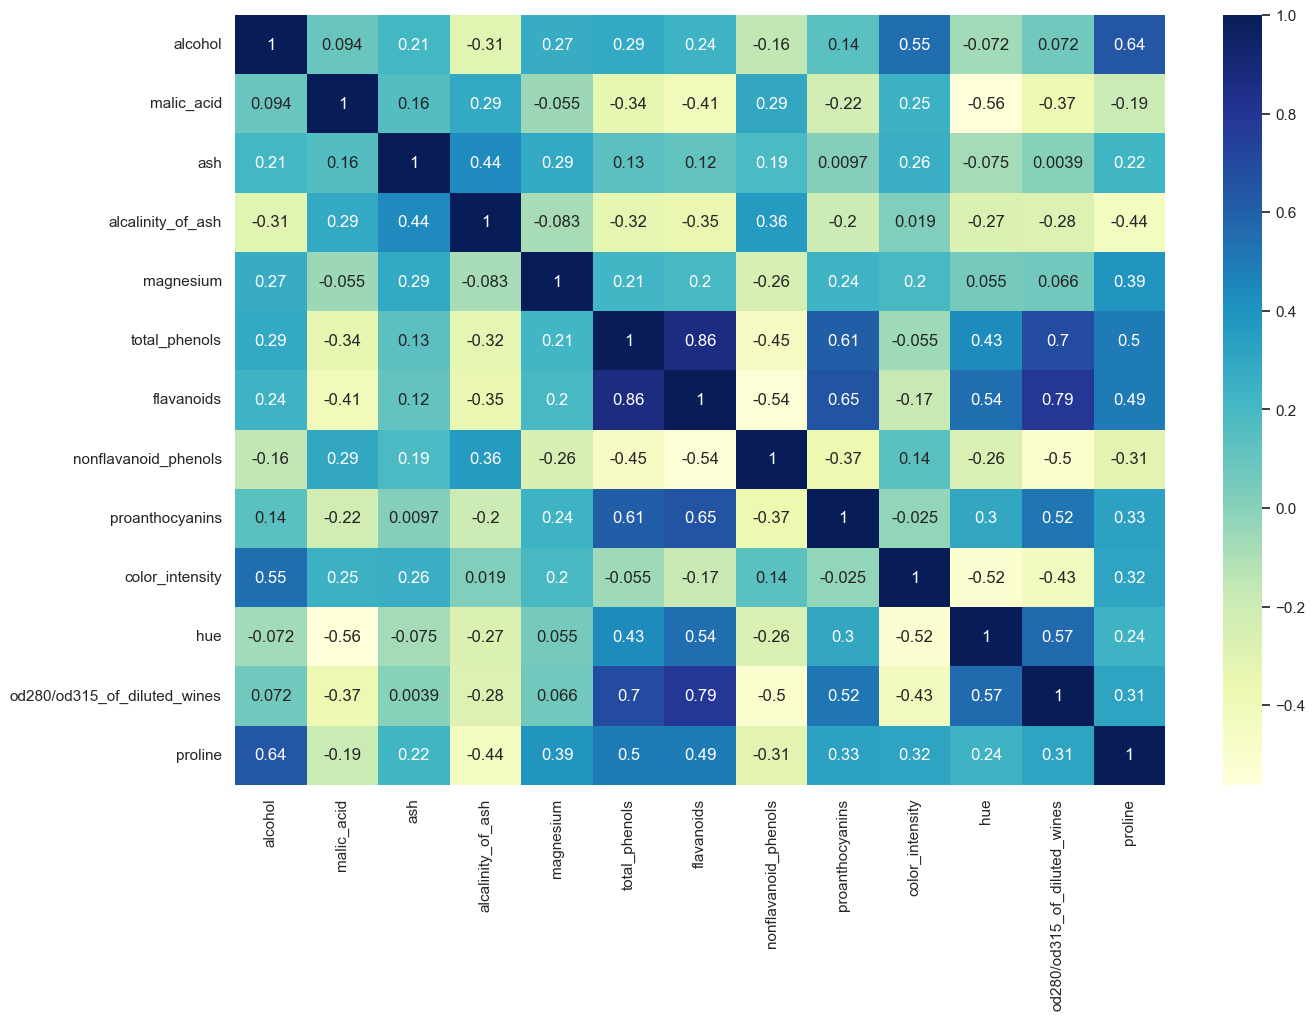

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu")
plt.show()

c:\Users\samkp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


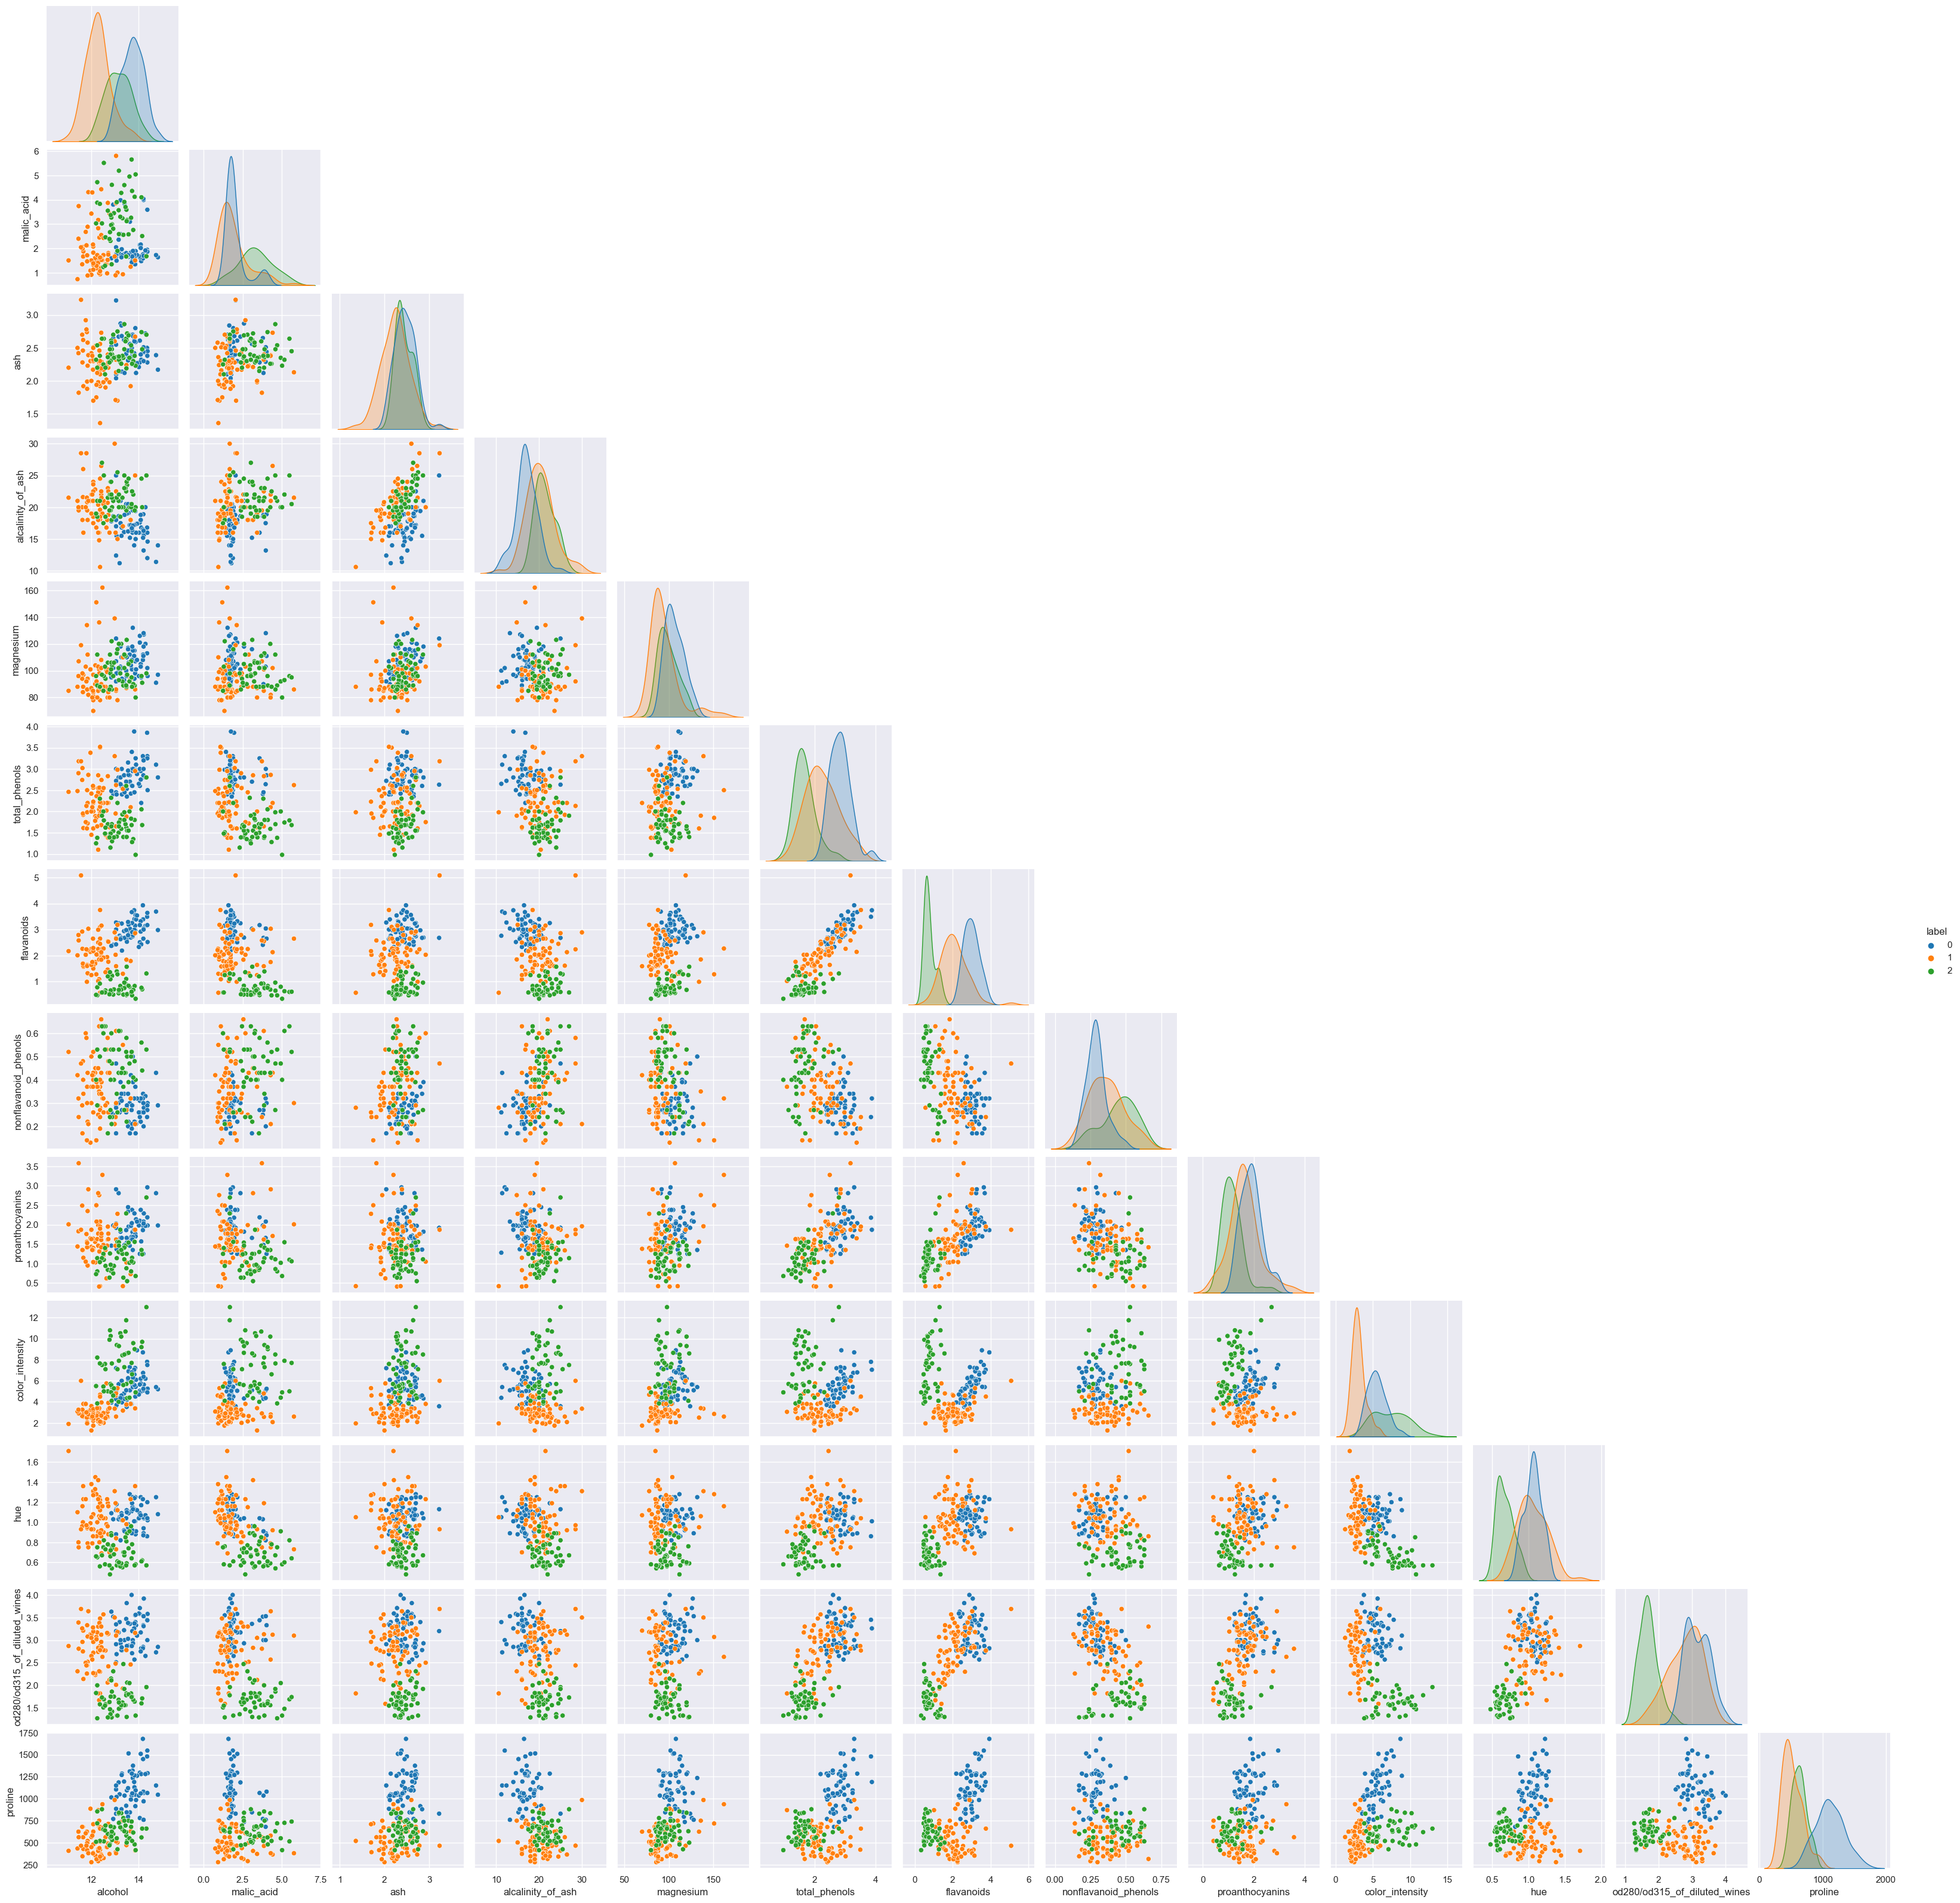

In [9]:
sns.pairplot(df, 
             hue='label', 
             palette="tab10", 
             corner=True)

plt.show()

PC	variance
---	--------
PC_1:	0.407
PC_2:	0.19
PC_3:	0.086
PC_4:	0.074
PC_5:	0.056
PC_6:	0.047
PC_7:	0.037
PC_8:	0.024
PC_9:	0.023
PC_10:	0.023
PC_11:	0.014
PC_12:	0.013
PC_13:	0.008


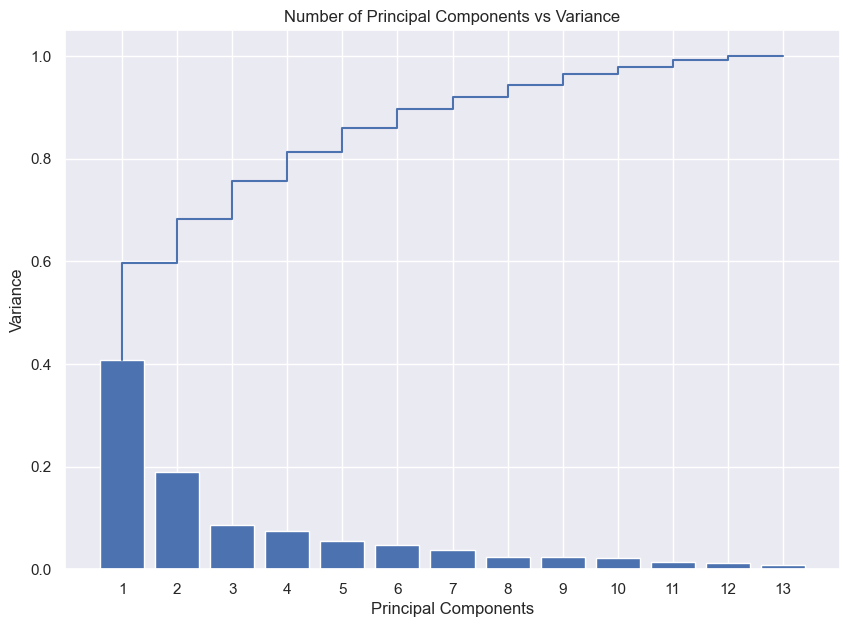

In [10]:
X = df.drop('label', axis=1).values
y = df.label.values
# I apply feature scaling to the entire dataset in order to apply PCA to display the dataset
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_sc = minmax.fit_transform(X)
# I determine percentage of variance for each principal component
from sklearn.decomposition import PCA
pc_range = np.arange(1,X_sc.shape[1] + 1)
pca = PCA(n_components=None)
pca.fit(X_sc)

plt.figure(figsize=(10,7))
plt.bar(pc_range, pca.explained_variance_ratio_)
plt.step(pc_range, np.cumsum(pca.explained_variance_ratio_))
plt.xticks(pc_range)
plt.xlabel("Principal Components")
plt.ylabel("Variance")
_ = plt.title("Number of Principal Components vs Variance")

print("PC\tvariance")
print("---\t--------")
for i,k in  enumerate(pca.explained_variance_ratio_):
    print('PC_{}:\t{}'.format(i+1, round(k, 3)))

In [11]:
df.describe().loc[['min', 'max']].T
y = df["label"]
X = df.iloc[:,:-1]

from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test = split(X, y, test_size=0.3, shuffle=True, random_state=0, stratify=y)

#scaling the data to equalise min and max of each feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# I do the scaler fitting on the training data only
#on the training test I do fit and transform simultaneously
X_train = scaler.fit_transform(X_train)

#now that the scaler has been trained on the training data, I do the transform on the test set
#The reason I fit the scaler using only the training data is because I don't want to bias the model with information from the test data.
X_test = scaler.transform(X_test)

In [12]:
from sklearn.svm import SVC #model I will train
from sklearn.model_selection import StratifiedKFold # for splitting the training-validation data
from sklearn.model_selection import GridSearchCV #for validating hyperparameters

crossval = StratifiedKFold(n_splits=5, shuffle=True, random_state=0) #choose how many subsets to create

#KERNEL: function used to map data into a higher dimension 
#in SVM+kernel, the idea is to transform the starting space (that of features)
#into a more complex one in which there is a hyperplane (hence something linear) separating the data

#C: adjusts the amount of errors accepted
#for high C the error committed on the training data will weight more in the SVM objective function
#the model is then asked to fail less (i.e. to fit the learning data more),
#but obtaining a more complex interpolation (= model) interpolation (with the risk, if one exaggerates, of overfitting).
#vice versa, if C is low, the model considers less important  the error made on the learning data: the model will be simpler;
#if you overdo it, the risk is that of underfitting; 
#if you think about it, if C is 0 I am ignoring the error I make on the learning data

#GAMMA (for RBF kernel): adjusts the curvature of the margins thus limiting the influence of each individual sample 
#gamma is proportional to the inverse of the standard deviation of the Gaussian
#"fitted" by the Gaussian kernel to each support vector

#DEGREE (for POLY kernel): degree of the polynomial function

parameters = [
               {"kernel": ["linear"], "C": [0.01, 0.1, 1, 10, 100]},
               {"kernel": ["rbf"], "C": [0.01, 0.1, 1, 10, 100], "gamma": [0.01, 0.1, 1, 10, 100]},
               {"kernel": ["poly"], "C": [0.01, 0.1, 1, 10, 100], "degree": np.arange(1,5,1)}
              ]

model = SVC()
clf = GridSearchCV(estimator= model, param_grid=parameters, cv=crossval, verbose=1 , n_jobs=-1)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'degree': array([1, 2, 3, 4]), 'kernel': ['poly']}],
             verbose=1)

In [13]:
scores = pd.DataFrame(clf.cv_results_)
scores = scores.sort_values(by="rank_test_score").set_index("rank_test_score")
int_cols = ["param_C", "param_kernel", "param_degree", "param_gamma", "mean_test_score"]
scores[int_cols].head()

param_C param_kernel param_degree param_gamma  mean_test_score
rank_test_score                                                               
1                   0.1         poly            1         NaN         0.967667
1                  0.01         poly            4         NaN         0.967667
3                   0.1       linear          NaN         NaN         0.959667
3                   0.1          rbf          NaN           1         0.959667
5                     1       linear          NaN         NaN         0.959333

In [15]:
from sklearn.metrics import accuracy_score as accuracy #accuracy metric
fitted_model = clf.best_estimator_

predictions = fitted_model.predict(X_test)
round(accuracy(y_test, predictions), 2) 

0.98

In [17]:
pred_train = clf.best_estimator_.predict(X_train)
pred_test = clf.best_estimator_.predict(X_test)
print(f"Best parameters are: {clf.best_params_}, with a score of {round(clf.best_score_,3)}")
print(f"Accuracy on training set is: {round(accuracy(y_train, pred_train), 3)}")
print(f"Accuracy on test set is : {round(accuracy(y_test, pred_test), 3)}")

Best parameters are: {'C': 0.01, 'degree': 4, 'kernel': 'poly'}, with a score of 0.968
Accuracy on training set is: 1.0
Accuracy on test set is : 0.981


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.95      1.00      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [20]:
### Deep Learning 

In [24]:
# Question: 1

# (a) Explain how you can implement DL in a real-world application.

""""
The DL models can be implemented in the following fields
Computer vision, 
Sentiment analysis, 
Automation industry, 
Recommendation systems, 
Autonomous vehicles,
Image analysis.

Not only above areas. Using Raspberry PI, NVIDIA Jetson, Google Coral boards can implement it for real-time applications.
"""

# (b) What is the use of Activation function in Artificial Neural Networks? What would be the problem if we don't use it in ANN networks.
"""
The activation function decides whether neuron triggers or not.
If we don't use activation function in ANN then neuron or nodes doesn't pass the information from one layer to another.
"""


"\nThe activation function decides whether neuron triggers or not.\nIf we don't use activation function in ANN then neuron or nodes doesn't pass the information from one layer to another.\n"

In [26]:
# Question: 2

# Train a Pure ANN with less than 10000 trainable parameters using the MNIST Dataset

In [38]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


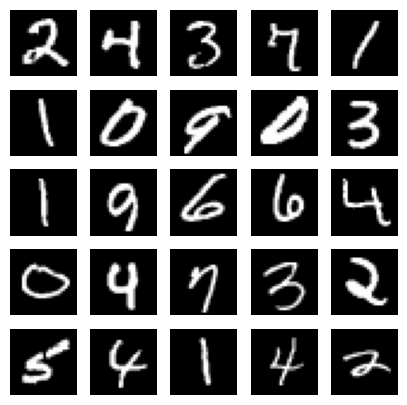

In [39]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [41]:
num_labels = len(np.unique(y_train))

In [42]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [43]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [44]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [46]:
# network parameters
batch_size = 64
hidden_units = 256
dropout = 0.5

In [47]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [50]:
!pip install pydot

  Obtaining dependency information for pydot from https://files.pythonhosted.org/packages/7f/90/c9b51f3cdff89cd8f93382060330f43d1af098a6624cff439e700791e922/pydot-2.0.0-py3-none-any.whl.metadata


In [52]:
!pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/de/5e/fcbb22c68208d39edff467809d06c9d81d7d27426460ebc598e55130c1aa/graphviz-0.20.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.0 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.0 kB ? eta -:--:--
   -------------------------- ------------- 30.7/47.0 kB 217.9 kB/s eta 0:00:01
   ---------------------------------------- 47.0/47.0 kB 262.8 kB/s eta 0:00:00


In [53]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [54]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [55]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20


938/938 [==============================] - 8s 6ms/step - loss: 0.4110 - accuracy: 0.8730
Epoch 2/20
938/938 [==============================] - 6s 6ms/step - loss: 0.2046 - accuracy: 0.9392
Epoch 3/20
938/938 [==============================] - 6s 7ms/step - loss: 0.1659 - accuracy: 0.9507
Epoch 4/20
938/938 [==============================] - 6s 7ms/step - loss: 0.1482 - accuracy: 0.9549
Epoch 5/20
938/938 [==============================] - 6s 7ms/step - loss: 0.1302 - accuracy: 0.9606
Epoch 6/20
938/938 [==============================] - 7s 7ms/step - loss: 0.1179 - accuracy: 0.9643
Epoch 7/20
938/938 [==============================] - 6s 7ms/step - loss: 0.1113 - accuracy: 0.9668
Epoch 8/20
938/938 [==============================] - 6s 7ms/step - loss: 0.1084 - accuracy: 0.9668
Epoch 9/20
938/938 [==============================] - 6s 7ms/step - loss: 0.1031 - accuracy: 0.9687
Epoch 10/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0970 - accuracy: 0.97

In [56]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

157/157 [==============================] - 1s 3ms/step - loss: 0.0699 - accuracy: 0.9819

Test accuracy: 98.2%


In [58]:
# Question: 3 

# Perform Regression Task using ANN

In [2]:
!pip install sklearn
!pip install pandas
!pip install numpy
!pip install matplotlib.pyplot  
!pip install seaborn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [3]:
import sklearn
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
data = pd.read_csv(r'C:\Users\samkp\Downloads\Assessment-2\boston_data.csv')

data.head()

ID  indus  chas    nox     rm   age     dis  rad  tax  ptratio  lstat  medv
0   1   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   4.98  24.0
1   2   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   9.14  21.6
2   4   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   2.94  33.4
3   5   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   5.33  36.2
4   7   7.87     0  0.524  6.012  66.6  5.5605    5  311     15.2  12.43  22.9

In [7]:
data[data.isnull().any(axis=1)].count()


ID         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

In [8]:
data.describe()

ID       indus        chas         nox          rm         age  \
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000   
mean   250.951952   11.293483    0.060060    0.557144    6.265619   68.226426   
std    147.859438    6.998123    0.237956    0.114955    0.703952   28.133344   
min      1.000000    0.740000    0.000000    0.385000    3.561000    6.000000   
25%    123.000000    5.130000    0.000000    0.453000    5.884000   45.400000   
50%    244.000000    9.900000    0.000000    0.538000    6.202000   76.700000   
75%    377.000000   18.100000    0.000000    0.631000    6.595000   93.800000   
max    506.000000   27.740000    1.000000    0.871000    8.725000  100.000000   

              dis         rad         tax     ptratio       lstat        medv  
count  333.000000  333.000000  333.000000  333.000000  333.000000  333.000000  
mean     3.709934    9.633634  409.279279   18.448048   12.515435   22.768769  
std      1.981123    8.742174  170.841988    2.151821    7.067781    9.173468  
min      1.129600    1.000000  188.000000   12.600000    1.730000    5.000000  
25%      2.122400    4.000000  279.000000   17.400000    7.180000   17.400000  
50%      3.092300    5.000000  330.000000   19.000000   10.970000   21.600000  
75%      5.116700   24.000000  666.000000   20.200000   16.420000   25.000000  
max     10.710300   24.000000  711.000000   21.200000   37.970000   50.000000

In [9]:
corr = data.corr()

corr

ID     indus      chas       nox        rm       age       dis  \
ID       1.000000  0.421978  0.007958  0.440185 -0.112790  0.257300 -0.356461   
indus    0.421978  1.000000  0.037496  0.750087 -0.440365  0.638378 -0.702327   
chas     0.007958  0.037496  1.000000  0.080275  0.112251  0.068286 -0.081834   
nox      0.440185  0.750087  0.080275  1.000000 -0.338515  0.736000 -0.769364   
rm      -0.112790 -0.440365  0.112251 -0.338515  1.000000 -0.248573  0.269191   
age      0.257300  0.638378  0.068286  0.736000 -0.248573  1.000000 -0.764208   
dis     -0.356461 -0.702327 -0.081834 -0.769364  0.269191 -0.764208  1.000000   
rad      0.707526  0.569779  0.007714  0.612180 -0.272783  0.447380 -0.477610   
tax      0.686246  0.708313 -0.021826  0.670722 -0.356987  0.511893 -0.529539   
ptratio  0.309838  0.391087 -0.125067  0.192513 -0.366927  0.259293 -0.231101   
lstat    0.281953  0.614155 -0.050055  0.598874 -0.615747  0.588834 -0.505939   
medv    -0.221694 -0.473932  0.204390 -0.413054  0.689598 -0.358888  0.249422   

              rad       tax   ptratio     lstat      medv  
ID       0.707526  0.686246  0.309838  0.281953 -0.221694  
indus    0.569779  0.708313  0.391087  0.614155 -0.473932  
chas     0.007714 -0.021826 -0.125067 -0.050055  0.204390  
nox      0.612180  0.670722  0.192513  0.598874 -0.413054  
rm      -0.272783 -0.356987 -0.366927 -0.615747  0.689598  
age      0.447380  0.511893  0.259293  0.588834 -0.358888  
dis     -0.477610 -0.529539 -0.231101 -0.505939  0.249422  
rad      1.000000  0.903562  0.470849  0.484568 -0.352251  
tax      0.903562  1.000000  0.467437  0.544485 -0.448078  
ptratio  0.470849  0.467437  1.000000  0.374802 -0.481376  
lstat    0.484568  0.544485  0.374802  1.000000 -0.738600  
medv    -0.352251 -0.448078 -0.481376 -0.738600  1.000000

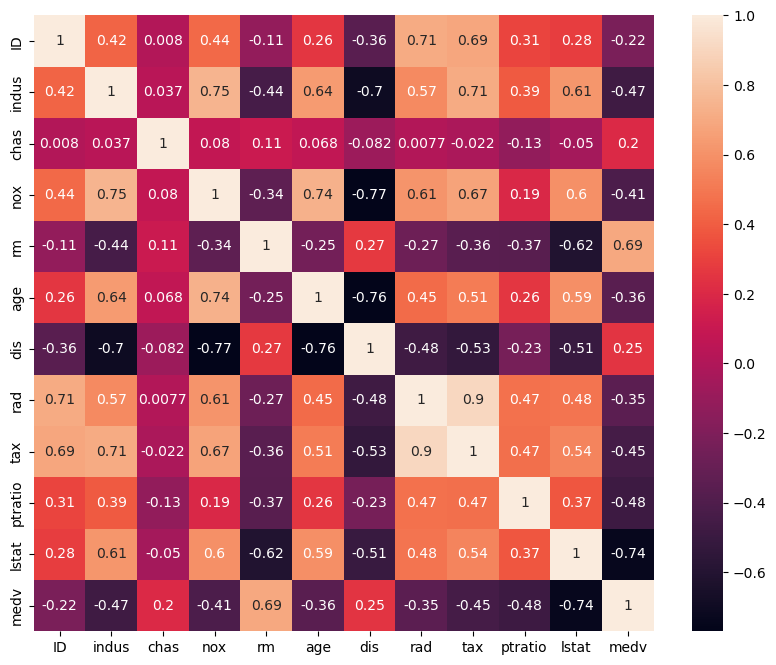

In [11]:
plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True)
plt.show()

In [14]:
!pip install scikit-learn

In [16]:
from sklearn.linear_model import LinearRegression

def linear_model(x_train, y_train):
    print("Linear Regression")
    linear_regression = LinearRegression()
    linear_regression.fit(x_train, y_train)
    return linear_regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


def build_and_train_model(data, target_name, reg_fn):
    X = data.drop(target_name, axis=1)
    Y = data[target_name]

    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

    scaler = StandardScaler()
    scaler.fit(x_train)

    x_train = scaler.transform(x_train)

    x_test = scaler.transform(x_test)
    
    model = reg_fn(x_train, y_train)
    score = model.score(x_train, y_train)
    print("Training Score : ", score)

    y_pred = model.predict(x_test)
    r_score = r2_score(y_test, y_pred)
    print("Testing Score : ", r_score)
    
    df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
    print(df_y.sample(10))
    plt.figure(figsize=(10, 8))

    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test.values, label='Actual')
    plt.ylabel("medv of home")
    plt.legend()
    plt.show()


    return {'model' : model, 
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test, 
            'y_pred' : y_pred, 'sample' : df_y.sample(10)
           }

Linear Regression
Training Score :  0.7191154693675491
Testing Score :  0.691708689565742
     y_test     y_pred
303    21.4  20.528022
124    29.9  31.569940
108    27.0  36.051172
74     19.4  19.845406
132    34.9  33.540582
160    48.3  37.243718
255     7.4   5.121107
55     23.9  27.326102
311    13.8  16.675553
63     22.6  27.743466


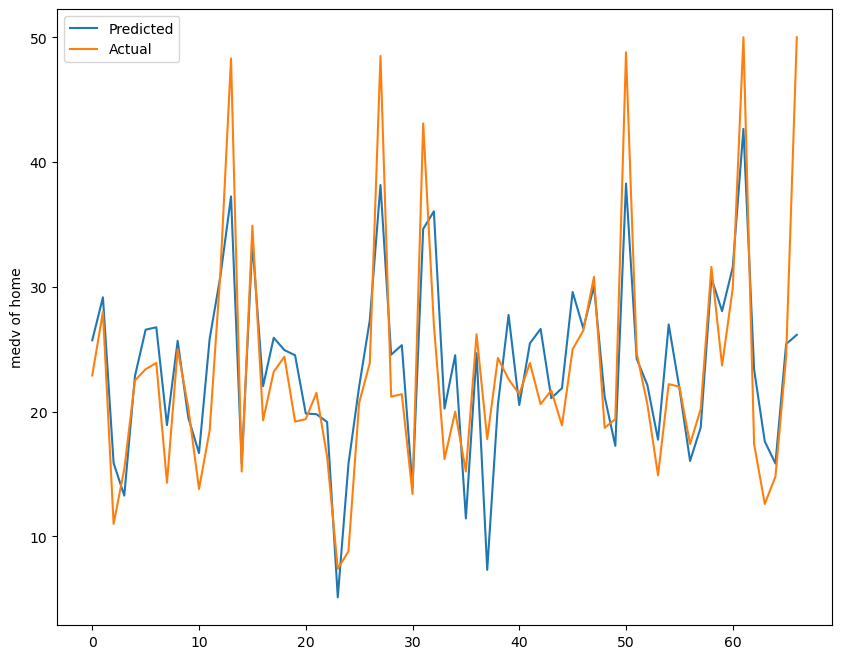

In [18]:
linear_reg = build_and_train_model(data, "medv", linear_model)